In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


In [38]:
df = pd.read_csv("/home/nextav/Desktop/marealb-iot/ML model/merged_data_1H.csv")

# df.isna().sum()
df = df.dropna(subset=['Densité'])
df = df.reset_index(drop=True)

df = df.drop(columns=['date','system_temperature', 'lidar_temperature','MORET 2', 'MORET 3', 'MORET 4', 'MORET 5','weather_windDirection','weather_windSpeed','Niveau N.G.T'])

In [39]:
df.columns

Index(['tds', 'ext_temperature', 'weather_rainfall', 'ext_humidity',
       'lidar_value', 'Densité'],
      dtype='object')

In [40]:
# Convert categorical data to numerical
#df['weather_windDirection'] = pd.Categorical(df['weather_windDirection']).codes
# Handle missing values if any
df.fillna(df.mean(numeric_only=True), inplace=True)


In [41]:
# Separate features and target
X = df.drop(columns=['Densité'])
y = df['Densité']


In [42]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R^2: {r2_rf:.2f}")


Random Forest MSE: 10.83
Random Forest R^2: 0.40


In [44]:
# Random Forest Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              parampip3 install -U scikit-learns=-1,
                              verbose=2)

# Fit grid search
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print(f"Best Random Forest Parameters: {best_params_rf}")

# Evaluate the best Random Forest model
y_pred_best_rf = best_model_rf.predict(X_test_scaled)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest MSE: {mse_best_rf:.2f}")
print(f"Best Random Forest R^2: {r2_best_rf:.2f}")


SyntaxError: invalid syntax (1238649429.py, line 13)

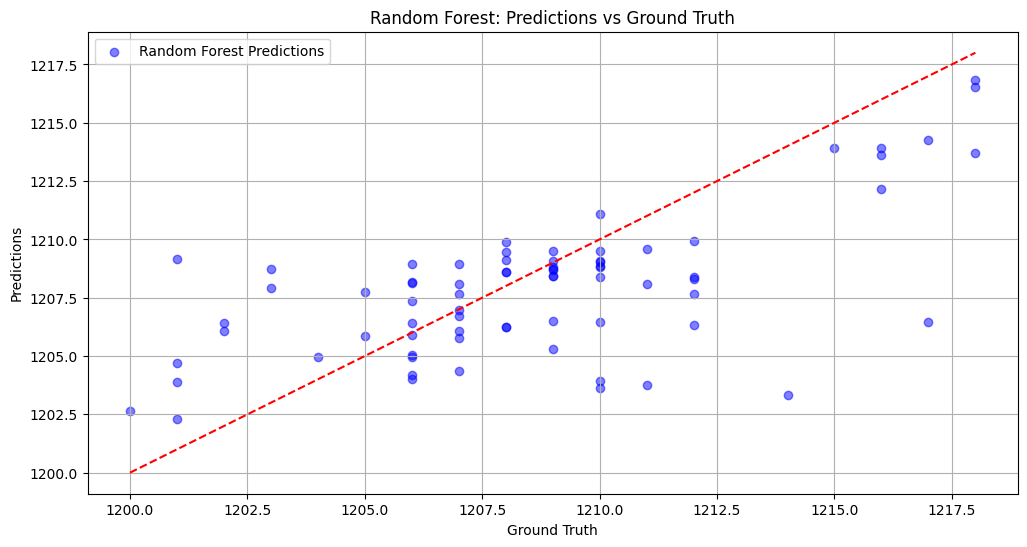

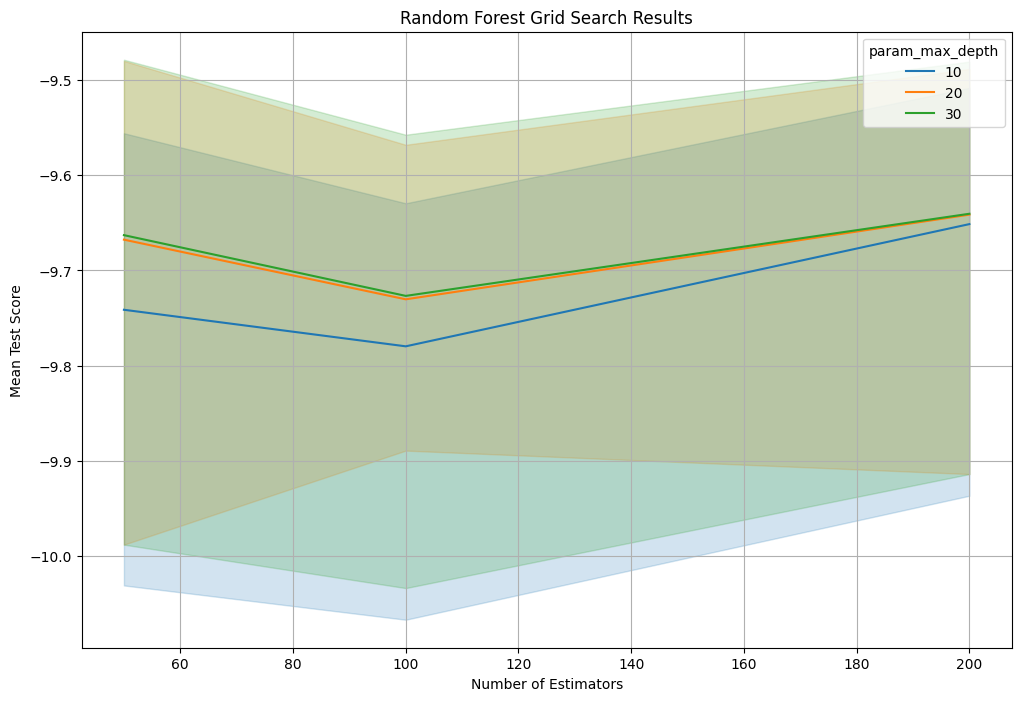

In [45]:
# Plot predictions vs ground truth for Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5, label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Predictions vs Ground Truth')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.grid(True)
plt.legend()
plt.show()

'''
# Plot predictions vs ground truth for Neural Network
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_nn, color='green', alpha=0.5, label='Neural Network Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Neural Network: Predictions vs Ground Truth')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.grid(True)
plt.legend()
plt.show()
'''
# Plot hyperparameters tuning results (Random Forest)
results_df = pd.DataFrame(grid_search_rf.cv_results_)
plt.figure(figsize=(12, 8))
sns.lineplot(data=results_df, x='param_n_estimators', y='mean_test_score', hue='param_max_depth')
plt.title('Random Forest Grid Search Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()


In [46]:
import joblib
# Save the best Random Forest model, and the scaler.
joblib.dump(best_model_rf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [48]:
import joblib
import numpy as np
# Load the Random Forest model, and the scaler.
loaded_model = joblib.load('random_forest_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

input_value = np.array([[327.731893,27.383333,0.0,97.266667,271.000000]])  # Replace 'float_value' with your actual float value

# Standardize the input value using the loaded scaler
input_value_scaled = loaded_scaler.transform(input_value)

# Predict using the loaded model
prediction = round(loaded_model.predict(input_value_scaled)[0])

# Output the prediction
print(f"Model Prediction: {prediction}")


Model Prediction: 1206


/home/nextav/anaconda3/envs/fbprophet_env/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [20]:
X_test

,tds,ext_temperature,weather_rainfall,ext_humidity,lidar_value,Niveau N.G.T
326,325.100471,28.166667,0.0,100.000000,271.000000,-122.0
33,306.129704,30.116667,0.0,80.100000,250.166667,-118.0
15,326.615818,27.916667,0.0,86.733333,249.833333,-117.0
345,327.731893,27.383333,0.0,97.266667,271.000000,-120.0
57,322.850894,29.616667,0.0,58.700000,261.000000,-117.0
...,...,...,...,...,...,...
82,311.824792,32.183333,0.0,70.583333,255.250000,-122.0
94,328.153908,28.550000,0.0,80.900000,257.000000,-112.0
195,328.944003,28.100000,0.0,72.883333,257.250000,-104.0
310,298.569973,30.733333,0.0,81.466667,271.250000,-108.0
